<a href="https://colab.research.google.com/github/Dennieeeee/ANZ-Customer-Transaction-Analysis/blob/main/Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/ANZ-Customer-Transaction-Analysis/main/Data/ANZ%20synthesised%20transaction%20dataset.csv')

In [59]:
df.head(1)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/18,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit


In [60]:
df.shape

(12043, 23)

## Missing Values

In [61]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [62]:
print('Entrees duplicates: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entrees duplicates: 0


In [63]:
#remove nulls in merchant_id
df=df.drop(df[df['merchant_id'].isnull()].index)
#remove nulls in merchant code
#df=df.drop(df[df['merchant_code'].isnull()].index)

In [64]:
df.shape

(7717, 23)

In [65]:
df.isnull().sum()

status                  0
card_present_flag       0
bpay_biller_code     7715
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id             0
merchant_code        7717
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb         0
merchant_state          0
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat       0
movement                0
dtype: int64

In [66]:
df['date']=pd.to_datetime(df['date'])

In [67]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Remove Unnecessary Columns

In [68]:
df1 = df[["status","card_present_flag","balance","date",'first_name',
          'country','merchant_long_lat',
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df1["date"] = pd.to_datetime(df1["date"])
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,status,card_present_flag,balance,date,first_name,country,merchant_long_lat,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,Diana,Australia,153.38 -27.99,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,Diana,Australia,151.21 -33.87,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,Michael,Australia,151.21 -33.87,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,Rhonda,Australia,153.05 -26.68,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,Diana,Australia,153.44 -28.06,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


split merchant_long_lat into longitutde and latitude

In [69]:
df1['longitude'], df1['latitude'] = df1['merchant_long_lat'].str.split(' ',1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df1['weekday'] = df1['date'].dt.day_name()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df1['month'] = df1['date'].dt.month_name()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
# another way to get month
'''
months = []
for date in df1["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

df1["Months"] = months
'''

'\nmonths = []\nfor date in df1["date"]:\n    if date.month == 8:\n        months.append("August")\n    elif date.month == 9:\n        months.append("September")\n    elif date.month == 10:\n        months.append("October")\n\ndf1["Months"] = months\n'

In [73]:
df1.head(1)

,status,card_present_flag,balance,date,first_name,country,merchant_long_lat,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,longitude,latitude,weekday,month
0,authorized,1.0,35.39,2018-08-01,Diana,Australia,153.38 -27.99,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,153.38,-27.99,Wednesday,August


## Outliers

In [74]:
df1.describe()

,card_present_flag,balance,age,amount
count,7717.000000,7717.000000,7717.000000,7717.000000
mean,0.802644,11871.056585,30.052093,40.153732
std,0.398029,25999.398243,9.439454,149.833070
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,2723.890000,23.000000,12.080000
50%,1.000000,5286.040000,27.000000,19.700000
75%,1.000000,10278.290000,38.000000,33.910000
max,1.000000,267093.660000,78.000000,7081.090000


Trim Outliers

In [75]:
#Trim outliers:
starting_percentile = df1['amount'].quantile(.02)
ending_percentile = df1['amount'].quantile(.98)
price_outliers_df = df1.loc[((df1['amount'] <= starting_percentile) | (df1['amount'] >= ending_percentile))]
df1 = df1.loc[((df1['amount'] > starting_percentile) & (df1['amount'] < ending_percentile))]

Amount

{'boxes': [<matplotlib.lines.Line2D at 0x7f547f5c0390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f547f5c0da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f547f48d860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f547f48d4e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f547f5c06a0>,
  <matplotlib.lines.Line2D at 0x7f547f5c0a20>]}

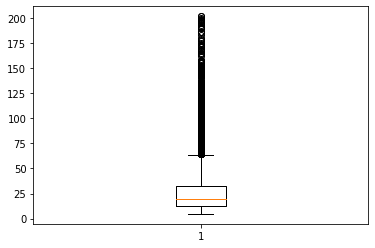

In [76]:
plt.boxplot(df1['amount'])

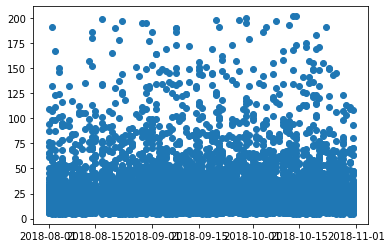

In [77]:
plt.scatter(x='date', y='amount', data=df1)

Balance

{'boxes': [<matplotlib.lines.Line2D at 0x7f547f339908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f547f347358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f547f347dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f547f347a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f547f339c18>,
  <matplotlib.lines.Line2D at 0x7f547f339f98>]}

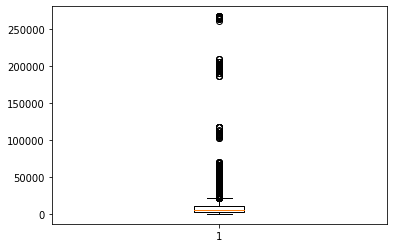

In [78]:
plt.boxplot(df1['balance'])

In [79]:
df1.to_csv('ANZ_clean.csv', index=False)

## Exploratory Data Analysis

In [80]:
df1['status'].value_counts()

authorized    7407
Name: status, dtype: int64

In [81]:
# someone has more than 1 account because there are 100 unique acounts
df1['first_name'].nunique()

80

In [82]:
df1['country'].value_counts()

Australia    7407
Name: country, dtype: int64

In [83]:
df1['customer_id'].nunique() #account id????

100

In [84]:
df1.head()

,status,card_present_flag,balance,date,first_name,country,merchant_long_lat,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,longitude,latitude,weekday,month
0,authorized,1.0,35.39,2018-08-01,Diana,Australia,153.38 -27.99,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,153.38,-27.99,Wednesday,August
1,authorized,0.0,21.20,2018-08-01,Diana,Australia,151.21 -33.87,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,151.21,-33.87,Wednesday,August
2,authorized,1.0,5.71,2018-08-01,Michael,Australia,151.21 -33.87,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,151.21,-33.87,Wednesday,August
3,authorized,1.0,2117.22,2018-08-01,Rhonda,Australia,153.05 -26.68,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,153.05,-26.68,Wednesday,August
6,authorized,1.0,1248.36,2018-08-01,Kristin,Australia,144.95 -37.53,F,43,Kalkallo,VIC,61.06,CUS-4123612273,debit,144.95,-37.53,Wednesday,August


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7407 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             7407 non-null   object        
 1   card_present_flag  7407 non-null   float64       
 2   balance            7407 non-null   float64       
 3   date               7407 non-null   datetime64[ns]
 4   first_name         7407 non-null   object        
 5   country            7407 non-null   object        
 6   merchant_long_lat  7407 non-null   object        
 7   gender             7407 non-null   object        
 8   age                7407 non-null   int64         
 9   merchant_suburb    7407 non-null   object        
 10  merchant_state     7407 non-null   object        
 11  amount             7407 non-null   float64       
 12  customer_id        7407 non-null   object        
 13  movement           7407 non-null   object        
 14  longitu

<strong>What's average amount each date?</strong>

In [86]:
df1[df1['first_name'].index.duplicated()]

,status,card_present_flag,balance,date,first_name,country,merchant_long_lat,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,longitude,latitude,weekday,month


In [87]:
date_count = df1.groupby(by='date').mean()
average_amount = date_count['amount'].mean()
points = len(date_count.index)

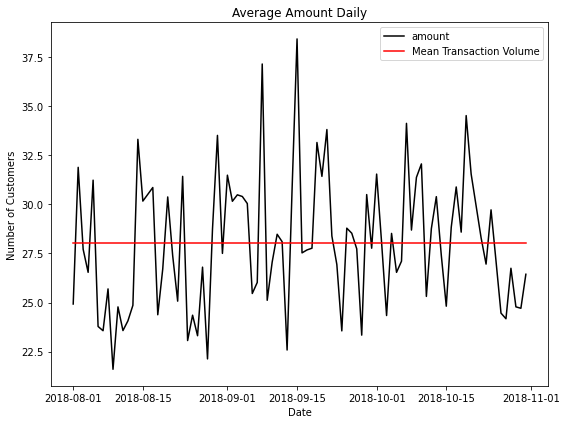

In [88]:
plt.figure(figsize=(8,6))
plt.plot(date_count.index, date_count['amount'], c='black', label = 'amount')
plt.plot(date_count.index, np.linspace(average_amount,average_amount,points), c='r', label = 'Mean Transaction Volume')
plt.title('Average Amount Daily')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.tight_layout()

<strong>What's the transaction volume daily?</strong>

In [89]:
date_count = df1.groupby('date').count()
volume = date_count['first_name'].mean()
points = len(date_count.index)

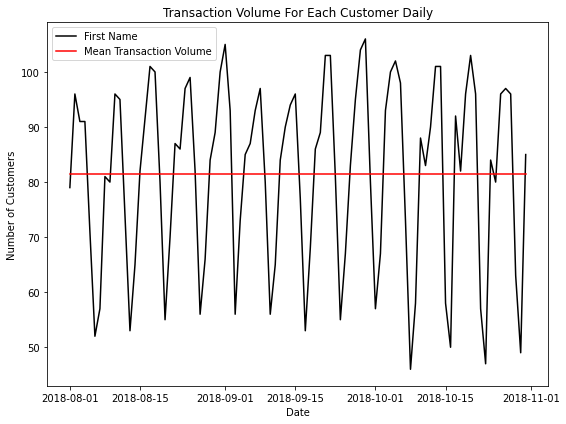

In [90]:
plt.figure(figsize=(8,6))
plt.plot(date_count.index, date_count['first_name'], c='black', label = 'First Name')
plt.plot(date_count.index, np.linspace(volume,volume,points), c='r', label = 'Mean Transaction Volume')
plt.title('Transaction Volume For Each Customer Daily')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.tight_layout()

<strong>Average customer balance by age: male vs. female</strong>
- August
- September
- October

August

In [91]:
cus_aug = df1[df1["month"] == "August"].groupby("customer_id").mean()
gen_aug = df1[df1["month"] == "August"].groupby("gender").mean()

In [92]:
gen_aug

,card_present_flag,balance,age,amount
gender,,,,
F,0.819087,5522.643029,30.130290,25.890589
M,0.792562,10624.390661,29.749587,27.739132


In [93]:
mean_f_bal_aug = gen_aug["balance"].iloc[0]
mean_m_bal_aug = gen_aug["balance"].iloc[1]
n_points = len(cus_aug["age"])

In [94]:
print(mean_f_bal_aug)
print(mean_m_bal_aug)

5522.64302904564
10624.390661157024


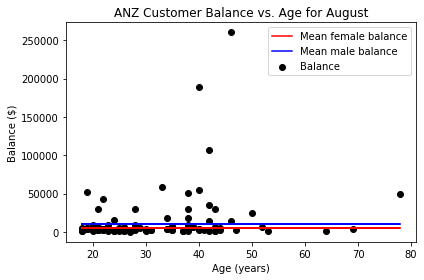

In [95]:
plt.scatter(cus_aug["age"], cus_aug["balance"], c="black", label="Balance")
plt.plot(cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [96]:
mean_f_bal_aug = gen_aug["amount"].iloc[0]
mean_m_bal_aug = gen_aug["amount"].iloc[1]

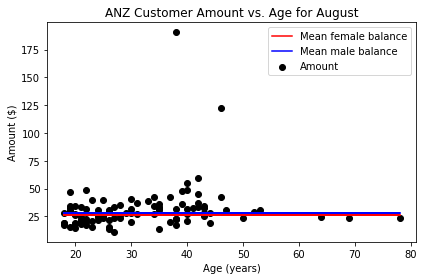

In [97]:
plt.scatter(cus_aug["age"], cus_aug["amount"], c="black", label="Amount")
plt.plot(cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

September

In [98]:
cus_aug = df1[df1["month"] == "September"].groupby("customer_id").mean()
gen_aug = df1[df1["month"] == "September"].groupby("gender").mean()

In [99]:
mean_f_bal_aug = gen_aug["balance"].iloc[0]
mean_m_bal_aug = gen_aug["balance"].iloc[1]
n_points = len(cus_aug["age"])

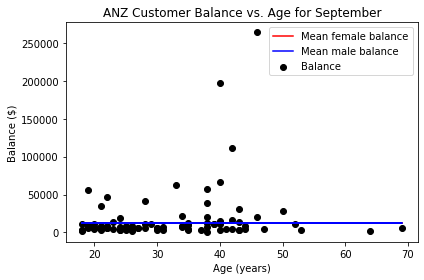

In [100]:
plt.scatter(cus_aug["age"], cus_aug["balance"], c="black", label="Balance")
plt.plot(cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [101]:
mean_f_bal_aug = gen_aug["amount"].iloc[0]
mean_m_bal_aug = gen_aug["amount"].iloc[1]
n_points = len(cus_aug["age"])

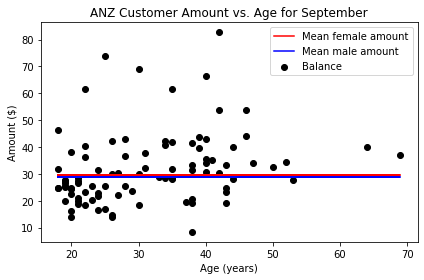

In [102]:
plt.scatter(cus_aug["age"], cus_aug["amount"], c="black", label="Balance")
plt.plot(cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female amount")
plt.plot(cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

October

In [103]:
cus_aug = df1[df1["month"] == "October"].groupby("customer_id").mean()
gen_aug = df1[df1["month"] == "October"].groupby("gender").mean()

In [104]:
mean_f_bal_aug = gen_aug["balance"].iloc[0]
mean_m_bal_aug = gen_aug["balance"].iloc[1]
n_points = len(cus_aug["age"])

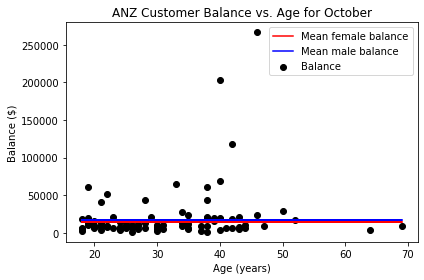

In [105]:
plt.scatter(cus_aug["age"], cus_aug["balance"], c="black", label="Balance")
plt.plot(cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [106]:
mean_f_bal_aug = gen_aug["amount"].iloc[0]
mean_m_bal_aug = gen_aug["amount"].iloc[1]
n_points = len(cus_aug["age"])

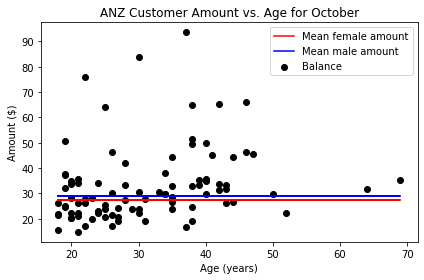

In [107]:
plt.scatter(cus_aug["age"], cus_aug["amount"], c="black", label="Balance")
plt.plot(cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female amount")
plt.plot(cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

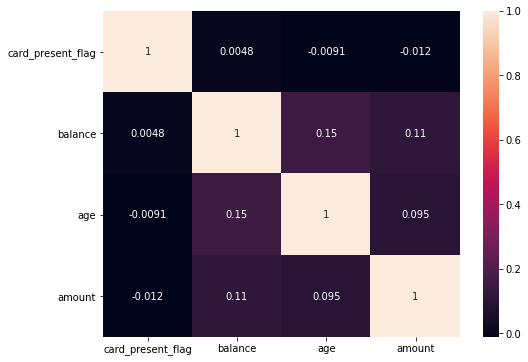

In [108]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


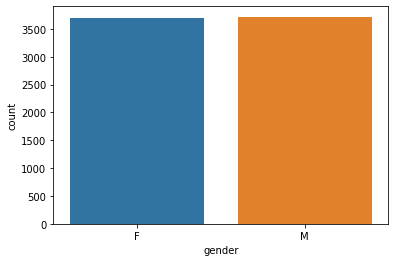

In [109]:
sns.countplot(df1['gender'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


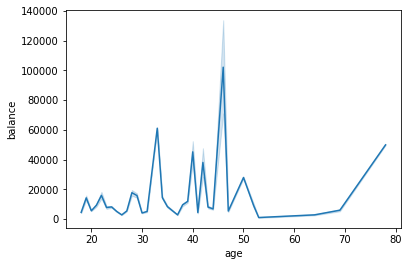

In [110]:
sns.lineplot('age','balance', data=df1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


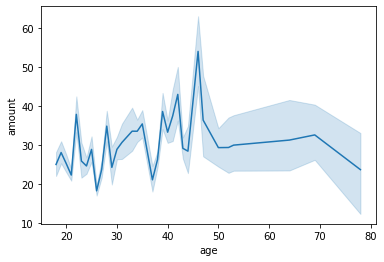

In [111]:
sns.lineplot('age','amount', data=df1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


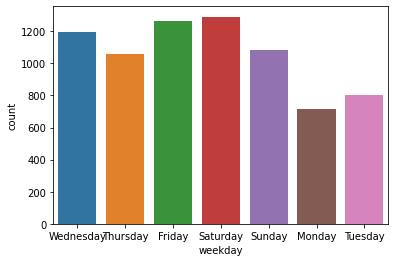

In [112]:
sns.countplot(df1['weekday'])